In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Resultats/Comparaison_Final

alanine-dipeptide-0-250ns-nowater.xtc  rmsd_comparison_enhanced.png
alanine-dipeptide-1-250ns-nowater.xtc  rmsd_curve_comparison.png
alanine-dipeptide-2-250ns-nowater.xtc  rmsd_final_distribution.png
alanine-dipeptide-nowater.pdb	       sma_1_features.npy
Comparaison_Final.ipynb		       sma_2_features.npy
comprehensive_energy_analysis.png      SMA_features.npy
energy_curve.png		       SMA_parallel_traj_ensemble_final_1.npz
energy_difference.png		       SMA_parallel_traj_ensemble_final_2.npz
final_energy_distribution.png	       SMA_parallel_traj_ensemble_final.npz
free_energy_tic0_joint.png	       sma_pca_scatter.png
free_energy_tic0_joint_three.png       tic0_sma_1_for_vs.npy
free_energy_tic0_xtc_only.png	       tic0_sma_2_for_vs.npy
joint_tica_xtc_only.png		       tica2d_joint.png
rmsd_comparison_clean.png


In [ ]:
%cd /content/drive/MyDrive/Resultats/Comparaison_Final

/content/drive/MyDrive/Resultats/Comparaison_Final


In [ ]:
!pip install pyemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mdtraj-1.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached deeptime-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached netCDF4-1.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached deeptime-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached mdtraj-1.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.0 MB/s eta 0:00:00
   ━━━━

In [ ]:
!pip install mdtraj

In [ ]:
import numpy as np

sma_features = np.load('SMA_features.npy')
sma_1_features = np.load('sma_1_features.npy')
sma_2_features = np.load('sma_2_features.npy')

# Check the shape of the loaded array
print(sma_features.shape)
print(sma_1_features.shape)
print(sma_2_features.shape)

(890, 63993)
(890, 63993)
(960, 63993)


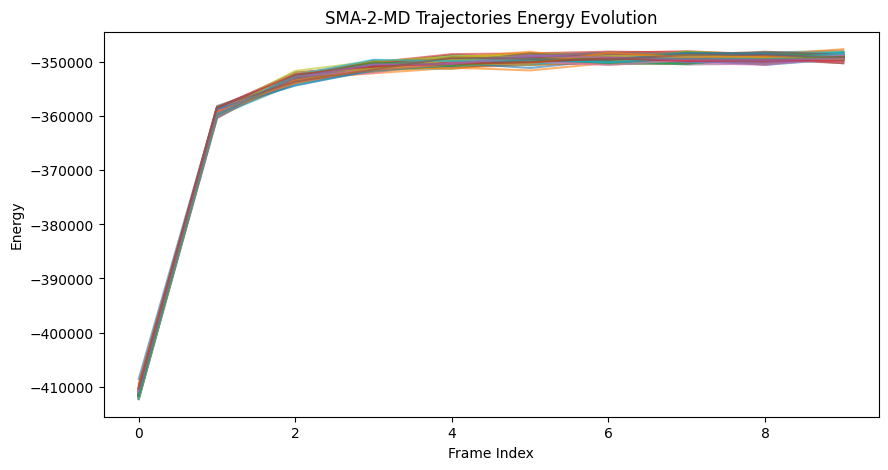

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("SMA_parallel_traj_ensemble_final_2.npz")

energy_keys = [k for k in data.files if k.startswith('energy_')]

all_energies = []
for key in energy_keys:
    traj_energy = data[key].flatten()
    all_energies.extend(traj_energy)

all_energies = np.array(all_energies)


plt.figure(figsize=(10,5))
for key in energy_keys:
    plt.plot(data[key], alpha=0.6)
plt.xlabel('Frame Index')
plt.ylabel('Energy')
plt.title('SMA-2-MD Trajectories Energy Evolution')
plt.show()

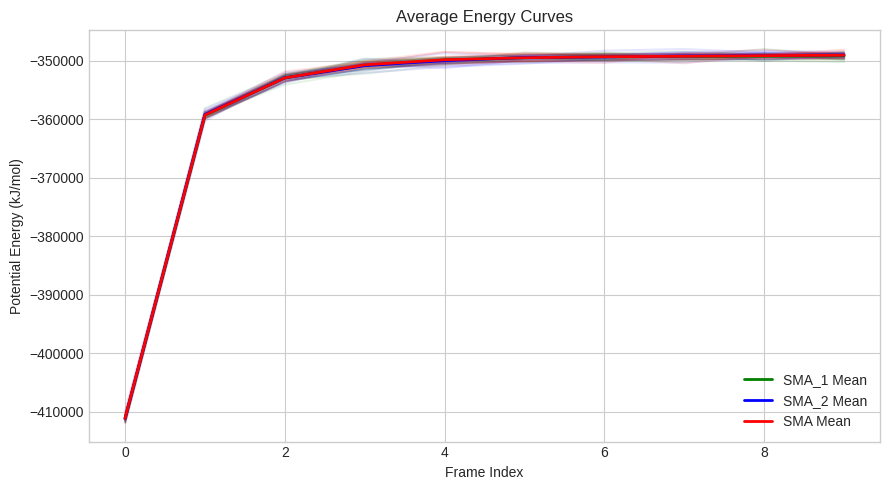

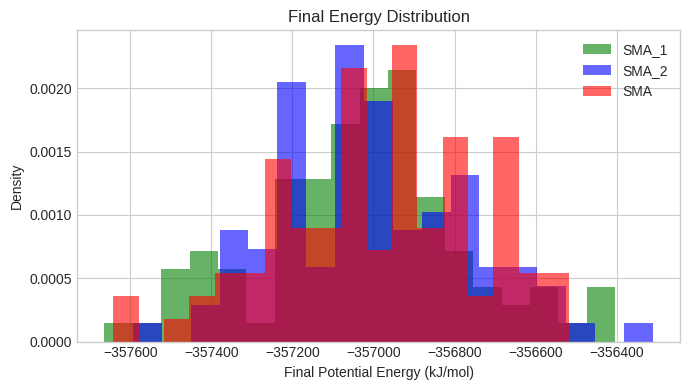

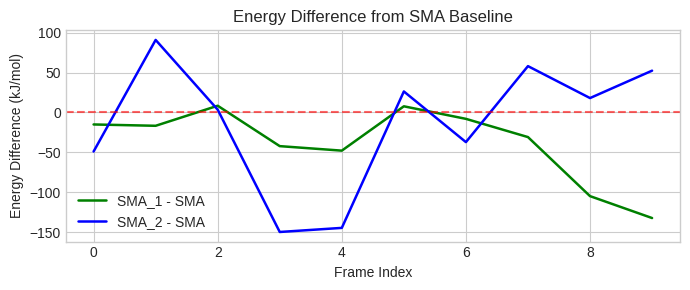

SMA_1 Final Energy: Mean = -357026.54, Std = 251.61
SMA_2 Final Energy: Mean = -357001.48, Std = 236.27
SMA   Final Energy: Mean = -356988.33, Std = 246.95


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_energy_arrays():
    """Load energy arrays from npz files."""
    sma_1 = np.load("SMA_parallel_traj_ensemble_final_1.npz")
    sma_2 = np.load("SMA_parallel_traj_ensemble_final_2.npz")
    sma   = np.load("SMA_parallel_traj_ensemble_final.npz")

    get_energies = lambda data: [data[k] for k in sorted(data.files) if k.startswith("energy_")]
    return get_energies(sma_1), get_energies(sma_2), get_energies(sma)

def plot_energy_curves(sma_1, sma_2, sma):
    """Plot average energy curves with ±1 std."""
    plt.figure(figsize=(9, 5))
    for arr in sma_1[:8]: plt.plot(arr, color="green", alpha=0.1)
    for arr in sma_2[:8]: plt.plot(arr, color="blue", alpha=0.1)
    for arr in sma[:8]: plt.plot(arr, color="red", alpha=0.1)

    sma_1_avg, sma_2_avg, sma_avg = [np.mean(np.stack(x), 0) for x in [sma_1, sma_2, sma]]
    sma_1_std, sma_2_std, sma_std = [np.std(np.stack(x), 0) for x in [sma_1, sma_2, sma]]

    x = np.arange(len(sma_1_avg))
    plt.plot(sma_1_avg, color="green", label="SMA_1 Mean", lw=2)
    plt.fill_between(x, sma_1_avg-sma_1_std, sma_1_avg+sma_1_std, color="green", alpha=0.15)

    plt.plot(sma_2_avg, color="blue", label="SMA_2 Mean", lw=2)
    plt.fill_between(x, sma_2_avg-sma_2_std, sma_2_avg+sma_2_std, color="blue", alpha=0.15)

    plt.plot(sma_avg, color="red", label="SMA Mean", lw=2)
    plt.fill_between(x, sma_avg-sma_std, sma_avg+sma_std, color="red", alpha=0.15)

    plt.xlabel("Frame Index")
    plt.ylabel("Potential Energy (kJ/mol)")
    plt.title("Average Energy Curves")
    plt.legend()
    plt.tight_layout()
    plt.savefig("energy_curve.png", dpi=200)
    plt.show()
    return sma_1_avg, sma_2_avg, sma_avg

def plot_final_energy_distribution(sma_1, sma_2, sma):
    """Plot histogram of mean final energy (last 10 frames) for each trajectory."""
    sma_1_final = [traj[-10:].mean() for traj in sma_1]
    sma_2_final = [traj[-10:].mean() for traj in sma_2]
    sma_final   = [traj[-10:].mean() for traj in sma]
    plt.figure(figsize=(7, 4))
    plt.hist(sma_1_final, bins=18, alpha=0.6, label="SMA_1", color="green", density=True)
    plt.hist(sma_2_final, bins=18, alpha=0.6, label="SMA_2", color="blue", density=True)
    plt.hist(sma_final,   bins=18, alpha=0.6, label="SMA", color="red", density=True)
    plt.xlabel("Final Potential Energy (kJ/mol)")
    plt.ylabel("Density")
    plt.title("Final Energy Distribution")
    plt.legend()
    plt.tight_layout()
    plt.savefig("final_energy_distribution.png", dpi=200)
    plt.show()
    return sma_1_final, sma_2_final, sma_final

def plot_energy_difference(sma_1_avg, sma_2_avg, sma_avg):
    """Plot energy difference from SMA baseline."""
    plt.figure(figsize=(7, 3))
    plt.plot(sma_1_avg - sma_avg, color="green", label="SMA_1 - SMA", lw=1.8)
    plt.plot(sma_2_avg - sma_avg, color="blue", label="SMA_2 - SMA", lw=1.8)
    plt.axhline(0, color="red", ls="--", alpha=0.6)
    plt.xlabel("Frame Index")
    plt.ylabel("Energy Difference (kJ/mol)")
    plt.title("Energy Difference from SMA Baseline")
    plt.legend()
    plt.tight_layout()
    plt.savefig("energy_difference.png", dpi=200)
    plt.show()

def print_stats(sma_1_final, sma_2_final, sma_final):
    """Print mean and std of final energies."""
    print(f"SMA_1 Final Energy: Mean = {np.mean(sma_1_final):.2f}, Std = {np.std(sma_1_final):.2f}")
    print(f"SMA_2 Final Energy: Mean = {np.mean(sma_2_final):.2f}, Std = {np.std(sma_2_final):.2f}")
    print(f"SMA   Final Energy: Mean = {np.mean(sma_final):.2f}, Std = {np.std(sma_final):.2f}")

if __name__ == "__main__":
    sma_1, sma_2, sma = load_energy_arrays()
    sma_1_avg, sma_2_avg, sma_avg = plot_energy_curves(sma_1, sma_2, sma)
    sma_1_final, sma_2_final, sma_final = plot_final_energy_distribution(sma_1, sma_2, sma)
    plot_energy_difference(sma_1_avg, sma_2_avg, sma_avg)
    print_stats(sma_1_final, sma_2_final, sma_final)

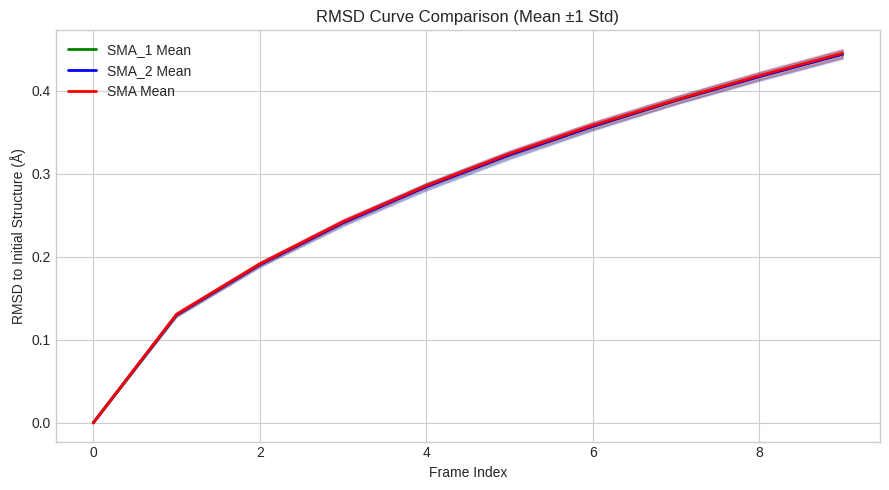

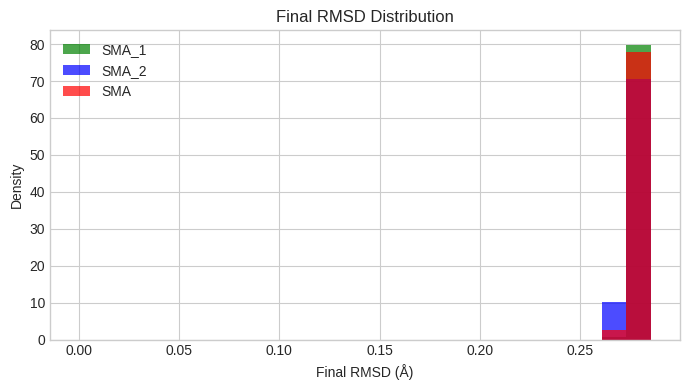

SMA_1 Final RMSD: Mean = 0.278, Std = 0.003
SMA_2 Final RMSD: Mean = 0.277, Std = 0.003
SMA   Final RMSD: Mean = 0.278, Std = 0.003


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rmsd(V, W):
    """Compute RMSD between two conformations V and W."""
    diff = V - W
    return np.sqrt(np.sum(diff ** 2) / V.shape[0])

def load_rmsd_arrays():
    """Load data and compute RMSD curves for each trajectory."""
    sma_1 = np.load("SMA_parallel_traj_ensemble_final_1.npz")
    sma_2 = np.load("SMA_parallel_traj_ensemble_final_2.npz")
    sma   = np.load("SMA_parallel_traj_ensemble_final.npz")

    get_keys = lambda d: sorted([k for k in d.files if k.startswith("pos_")])

    def compute_rmsd_all(data):
        arr = []
        for k in get_keys(data):
            pos = data[k]        # (frames, atoms, 3)
            ref = pos[0]
            arr.append([rmsd(frame, ref) for frame in pos])
        return np.array(arr)
    return compute_rmsd_all(sma_1), compute_rmsd_all(sma_2), compute_rmsd_all(sma)

def plot_rmsd_curves(sma_1_rmsd, sma_2_rmsd, sma_rmsd):
    """Plot mean RMSD curves with ±1 std (confidence intervals)."""
    plt.figure(figsize=(9, 5))
    sma_1_mean = np.mean(sma_1_rmsd, axis=0)
    sma_2_mean = np.mean(sma_2_rmsd, axis=0)
    sma_mean   = np.mean(sma_rmsd, axis=0)
    sma_1_std  = np.std(sma_1_rmsd, axis=0)
    sma_2_std  = np.std(sma_2_rmsd, axis=0)
    sma_std    = np.std(sma_rmsd, axis=0)
    x = np.arange(len(sma_1_mean))
    plt.plot(sma_1_mean, color='green', label="SMA_1 Mean", lw=2)
    plt.fill_between(x, sma_1_mean-sma_1_std, sma_1_mean+sma_1_std, color='green', alpha=0.18)
    plt.plot(sma_2_mean, color='blue', label="SMA_2 Mean", lw=2)
    plt.fill_between(x, sma_2_mean-sma_2_std, sma_2_mean+sma_2_std, color='blue', alpha=0.18)
    plt.plot(sma_mean,   color='red',   label="SMA Mean", lw=2)
    plt.fill_between(x, sma_mean-sma_std, sma_mean+sma_std, color='red', alpha=0.18)
    plt.xlabel("Frame Index")
    plt.ylabel("RMSD to Initial Structure (Å)")
    plt.title("RMSD Curve Comparison (Mean ±1 Std)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("rmsd_curve_comparison.png", dpi=200)
    plt.show()
    return sma_1_mean, sma_2_mean, sma_mean

def plot_final_rmsd_distribution(sma_1_rmsd, sma_2_rmsd, sma_rmsd):
    """Plot histogram of mean final RMSD (last 100 frames) for each trajectory."""
    sma_1_final = sma_1_rmsd[:, -100:].mean(axis=1)
    sma_2_final = sma_2_rmsd[:, -100:].mean(axis=1)
    sma_final   = sma_rmsd[:, -100:].mean(axis=1)
    plt.figure(figsize=(7, 4))
    bins = np.linspace(0, max(sma_1_final.max(), sma_2_final.max(), sma_final.max()), 24)
    plt.hist(sma_1_final, bins=bins, alpha=0.7, label="SMA_1", color="green", density=True)
    plt.hist(sma_2_final, bins=bins, alpha=0.7, label="SMA_2", color="blue", density=True)
    plt.hist(sma_final,   bins=bins, alpha=0.7, label="SMA", color="red", density=True)
    plt.xlabel("Final RMSD (Å)")
    plt.ylabel("Density")
    plt.title("Final RMSD Distribution")
    plt.legend()
    plt.tight_layout()
    plt.savefig("rmsd_final_distribution.png", dpi=200)
    plt.show()
    return sma_1_final, sma_2_final, sma_final

def print_rmsd_stats(sma_1_final, sma_2_final, sma_final):
    print(f"SMA_1 Final RMSD: Mean = {np.mean(sma_1_final):.3f}, Std = {np.std(sma_1_final):.3f}")
    print(f"SMA_2 Final RMSD: Mean = {np.mean(sma_2_final):.3f}, Std = {np.std(sma_2_final):.3f}")
    print(f"SMA   Final RMSD: Mean = {np.mean(sma_final):.3f}, Std = {np.std(sma_final):.3f}")

if __name__ == "__main__":
    sma_1_rmsd, sma_2_rmsd, sma_rmsd = load_rmsd_arrays()
    sma_1_mean, sma_2_mean, sma_mean = plot_rmsd_curves(sma_1_rmsd, sma_2_rmsd, sma_rmsd)
    sma_1_final, sma_2_final, sma_final = plot_final_rmsd_distribution(sma_1_rmsd, sma_2_rmsd, sma_rmsd)
    print_rmsd_stats(sma_1_final, sma_2_final, sma_final)

In [ ]:
#Etape 1-1： all atoms

import numpy as np

# 载入SMA
sma_data = np.load('SMA_parallel_traj_ensemble_final.npz')
sma_pos_keys = sorted([k for k in sma_data.files if k.startswith("pos_")])
sma_features = []
for k in sma_pos_keys:
    pos = sma_data[k]      # (frames, atoms, 3)
    n_frames = pos.shape[0]
    features = pos.reshape((n_frames, -1))
    sma_features.append(features)
sma_features = np.concatenate(sma_features, axis=0)
print("SMA feature shape:", sma_features.shape)
np.save("SMA_features.npy", sma_features)

# 载入SMA-1
sma_1_data = np.load('SMA_parallel_traj_ensemble_final_1.npz')
sma_1_pos_keys = sorted([k for k in sma_data.files if k.startswith("pos_")])
sma_1_features = []
for k in sma_1_pos_keys:
    pos = sma_1_data[k]      # (frames, atoms, 3)
    n_frames = pos.shape[0]
    features = pos.reshape((n_frames, -1))
    sma_1_features.append(features)
sma_1_features = np.concatenate(sma_1_features, axis=0)
print("SMA_1 feature shape:", sma_1_features.shape)
np.save("sma_1_features.npy", sma_1_features)

# 载入RE
sma_2_data = np.load('SMA_parallel_traj_ensemble_final_2.npz')
sma_2_pos_keys = sorted([k for k in sma_2_data.files if k.startswith("pos_")])
sma_2_features = []
for k in sma_2_pos_keys:
    pos = sma_2_data[k]
    n_frames = pos.shape[0]
    features = pos.reshape((n_frames, -1))
    sma_2_features.append(features)
sma_2_features = np.concatenate(sma_2_features, axis=0)
print("Sma_2 feature shape:", sma_2_features.shape)
np.save("sma_2_features.npy", sma_2_features)

SMA feature shape: (890, 63993)
SMA_1 feature shape: (890, 63993)
Sma_2 feature shape: (960, 63993)


In [ ]:
features = np.load('sma_1_features.npy')

print("Shape:", features.shape)
print("Max:", np.max(features))
print("Min:", np.min(features))
print("Any NaN:", np.isnan(features).any())
print("Any Inf:", np.isinf(features).any())
print("Mean:", np.mean(features))
print("Std:", np.std(features))

Shape: (890, 63993)
Max: 4.386543389401659
Min: -4.128333307055138
Any NaN: False
Any Inf: False
Mean: 0.08573608244783731
Std: 1.7442642958647545


In [ ]:
features = np.load('sma_2_features.npy')

print("Shape:", features.shape)
print("Max:", np.max(features))
print("Min:", np.min(features))
print("Any NaN:", np.isnan(features).any())
print("Any Inf:", np.isinf(features).any())
print("Mean:", np.mean(features))
print("Std:", np.std(features))

Shape: (960, 63993)
Max: 4.30135991865113
Min: -4.0968288278101035
Any NaN: False
Any Inf: False
Mean: 0.09102043014964115
Std: 1.7443983356802308


In [ ]:
features = np.load('SMA_features.npy')

print("Shape:", features.shape)
print("Max:", np.max(features))
print("Min:", np.min(features))
print("Any NaN:", np.isnan(features).any())
print("Any Inf:", np.isinf(features).any())
print("Mean:", np.mean(features))
print("Std:", np.std(features))

Shape: (890, 63993)
Max: 4.235433503743238
Min: -4.2096029528077885
Any NaN: False
Any Inf: False
Mean: 0.09048600031213759
Std: 1.7445760970302389


In [ ]:
!pip install pyemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mdtraj-1.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached deeptime-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached netCDF4-1.7.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached deeptime-0.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached mdtraj-1.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
   ━━━━

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pyemma

# 1. 读取数据
sma_2_features = np.load('sma_2_features.npy')
sma_1_features = np.load('sma_1_features.npy')

# 2. 合并做归一化
all_features = np.concatenate([sma_2_features, sma_1_features], axis=0)
n_sma_2 = len(sma_2_features)
n_sma_1 = len(sma_1_features)

scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
sma_scaled = all_features_scaled[:n_sma_2]
sma_1_scaled = all_features_scaled[n_sma_2:]

# 3. PCA降到50维
pca = PCA(n_components=50)
all_pca = pca.fit_transform(all_features_scaled)
sma_2_pca = all_pca[:n_sma_2]
sma_1_pca = all_pca[n_sma_2:]

# 4. 只fit一次tICA，用SMA做fit，SMA-1用transform
all_tica = pyemma.coordinates.tica([sma_2_pca, sma_1_pca], lag=1, dim=1)
tic0_sma_2_joint = all_tica.get_output()[0][:, 0]
tic0_sma_1_joint = all_tica.get_output()[1][:, 0]

np.save("tic0_sma_2_for_vs.npy", tic0_sma_2_joint)
np.save("tic0_sma_1_for_vs.npy", tic0_sma_1_joint)

<ipython-input-47-269371453>:27: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-47-269371453> line 27. Use deeptime.decomposition.TICA instead.
  all_tica = pyemma.coordinates.tica([sma_2_pca, sma_1_pca], lag=1, dim=1)


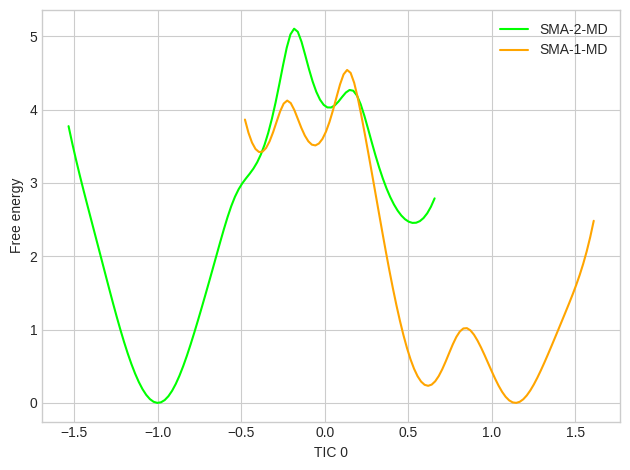

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


tic0_sma_2 = np.load("tic0_sma_2_for_vs.npy")
tic0_sma_1 = np.load("tic0_sma_1_for_vs.npy")

def free_energy_kde(x, grids=100):
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), grids)
    prob = kde(x_grid)
    fe = -np.log(prob + 1e-8)
    fe -= fe.min()
    return x_grid, fe

x_sma_2, fe_sma = free_energy_kde(tic0_sma_2)
x_sma_1, fe_sma_1 = free_energy_kde(tic0_sma_1)

plt.plot(x_sma_2, fe_sma, label='SMA-2-MD', color='lime')
plt.plot(x_sma_1, fe_sma_1, label='SMA-1-MD', color='orange')
plt.xlabel("TIC 0")
plt.ylabel("Free energy")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-51-2443149668>:28: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-51-2443149668> line 28. Use deeptime.decomposition.TICA instead.
  tica = pyemma.coordinates.tica([sma_2_pca, sma_1_pca], lag=1, dim=1)


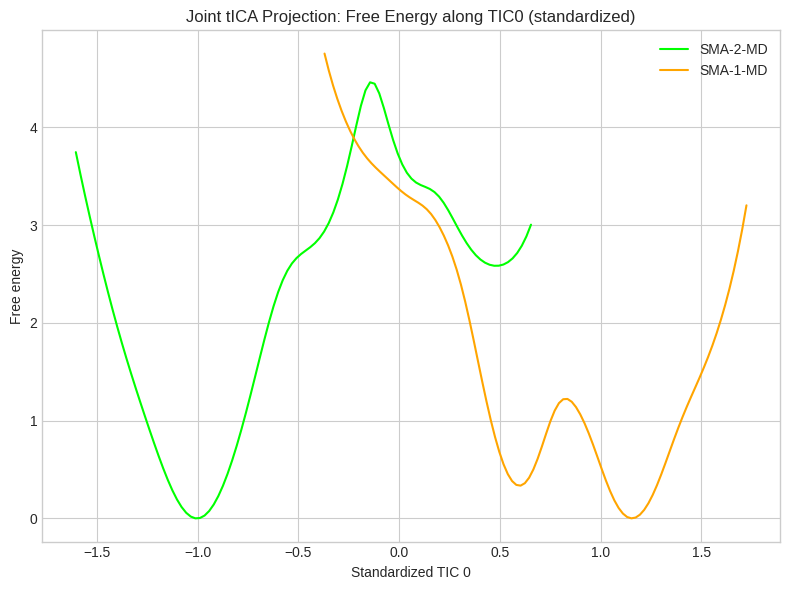

SMA-2-MD: TIC0 mean=-0.883, std=0.433
SMA-1-MD: TIC0 mean=0.953, std=0.357


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pyemma
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Load features
sma_2_features = np.load('sma_2_features.npy')
sma_1_features = np.load('sma_1_features.npy')

# 2. Concatenate for joint preprocessing
all_features = np.concatenate([sma_2_features, sma_1_features], axis=0)
n_sma_2 = len(sma_2_features)
n_sma_1 = len(sma_1_features)

# 3. Standardize
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# 4. PCA (dimensionality reduction)
pca = PCA(n_components=50)
all_pca = pca.fit_transform(all_features_scaled)
sma_2_pca = all_pca[:n_sma_2]
sma_1_pca = all_pca[n_sma_2:]

# 5. Joint tICA fitting
tica = pyemma.coordinates.tica([sma_2_pca, sma_1_pca], lag=1, dim=1)
tic0_sma_2 = tica.get_output()[0][:, 0]
tic0_sma_1 = tica.get_output()[1][:, 0]

# 6. Concatenate and standardize TIC0 for fair comparison
tic0_all = np.concatenate([tic0_sma_2, tic0_sma_1])
scaler_tic = StandardScaler()
tic0_all_scaled = scaler_tic.fit_transform(tic0_all.reshape(-1, 1)).flatten()
tic0_sma_2_scaled = tic0_all_scaled[:len(tic0_sma_2)]
tic0_sma_1_scaled = tic0_all_scaled[len(tic0_sma_2):]

# 7. Free energy landscape (KDE)
def free_energy_kde(x, grids=100):
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), grids)
    prob = kde(x_grid)
    fe = -np.log(prob + 1e-8)
    fe -= fe.min()
    return x_grid, fe

x_sma_2, fe_sma_2 = free_energy_kde(tic0_sma_2_scaled)
x_sma_1, fe_sma_1 = free_energy_kde(tic0_sma_1_scaled)

# 8. Plot
plt.figure(figsize=(8, 6))
plt.plot(x_sma_2, fe_sma_2, label='SMA-2-MD', color='lime')
plt.plot(x_sma_1, fe_sma_1, label='SMA-1-MD', color='orange')
plt.xlabel("Standardized TIC 0")
plt.ylabel("Free energy")
plt.title("Joint tICA Projection: Free Energy along TIC0 (standardized)")
plt.legend()
plt.tight_layout()
plt.savefig("free_energy_tic0_joint.png", dpi=200)
plt.show()

# 9. Print mean/std as a quick check
print(f"SMA-2-MD: TIC0 mean={np.mean(tic0_sma_2_scaled):.3f}, std={np.std(tic0_sma_2_scaled):.3f}")
print(f"SMA-1-MD: TIC0 mean={np.mean(tic0_sma_1_scaled):.3f}, std={np.std(tic0_sma_1_scaled):.3f}")

<ipython-input-11-3975840982>:31: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-11-3975840982> line 31. Use deeptime.decomposition.TICA instead.
  tica = pyemma.coordinates.tica([sma_pca, sma_1_pca, sma_2_pca], lag=1, dim=1)


calculate covariances:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

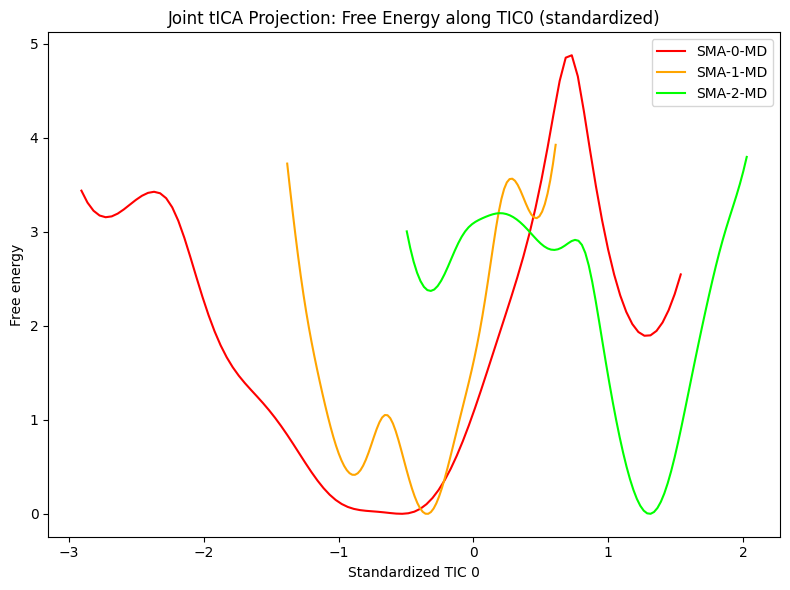

SMA-0-MD: TIC0 mean=-0.693, std=0.722
SMA-1-MD: TIC0 mean=-0.536, std=0.354
SMA-2-MD: TIC0 mean=1.139, std=0.496


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pyemma
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Load features
sma_features = np.load('SMA_features.npy')
sma_1_features = np.load('sma_1_features.npy')
sma_2_features = np.load('sma_2_features.npy')

# 2. Concatenate for joint preprocessing
all_features = np.concatenate([sma_features, sma_1_features, sma_2_features], axis=0)
n_sma = len(sma_features)
n_sma_1 = len(sma_1_features)
n_sma_2 = len(sma_2_features)

# 3. Standardize all features
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

# 4. PCA (dimensionality reduction, 50 components is common)
pca = PCA(n_components=50)
all_pca = pca.fit_transform(all_features_scaled)
sma_pca = all_pca[:n_sma]
sma_1_pca = all_pca[n_sma:n_sma+n_sma_1]
sma_2_pca = all_pca[n_sma+n_sma_1:]

# 5. Joint tICA fitting on all groups
tica = pyemma.coordinates.tica([sma_pca, sma_1_pca, sma_2_pca], lag=1, dim=1)
tic0_sma = tica.get_output()[0][:, 0]
tic0_sma_1 = tica.get_output()[1][:, 0]
tic0_sma_2 = tica.get_output()[2][:, 0]

# 6. Standardize TIC0 (optional, for fair density comparison)
tic0_all = np.concatenate([tic0_sma, tic0_sma_1, tic0_sma_2])
scaler_tic = StandardScaler()
tic0_all_scaled = scaler_tic.fit_transform(tic0_all.reshape(-1, 1)).flatten()
tic0_sma_scaled = tic0_all_scaled[:len(tic0_sma)]
tic0_sma_1_scaled = tic0_all_scaled[len(tic0_sma):len(tic0_sma)+len(tic0_sma_1)]
tic0_sma_2_scaled = tic0_all_scaled[len(tic0_sma)+len(tic0_sma_1):]

# 7. Free energy landscape (KDE)
def free_energy_kde(x, grids=100):
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), grids)
    prob = kde(x_grid)
    fe = -np.log(prob + 1e-8)
    fe -= fe.min()
    return x_grid, fe

x_sma, fe_sma = free_energy_kde(tic0_sma_scaled)
x_sma_1, fe_sma_1 = free_energy_kde(tic0_sma_1_scaled)
x_sma_2, fe_sma_2 = free_energy_kde(tic0_sma_2_scaled)

# 8. Plot
plt.figure(figsize=(8, 6))
plt.plot(x_sma, fe_sma, label='SMA-0-MD', color='red')
plt.plot(x_sma_1, fe_sma_1, label='SMA-1-MD', color='orange')
plt.plot(x_sma_2, fe_sma_2, label='SMA-2-MD', color='lime')
plt.xlabel("Standardized TIC 0")
plt.ylabel("Free energy")
plt.title("Joint tICA Projection: Free Energy along TIC0 (standardized)")
plt.legend()
plt.tight_layout()
plt.savefig("free_energy_tic0_joint_three.png", dpi=200)
plt.show()

# 9. Print means/stds for reporting
print(f"SMA-0-MD: TIC0 mean={np.mean(tic0_sma_scaled):.3f}, std={np.std(tic0_sma_scaled):.3f}")
print(f"SMA-1-MD: TIC0 mean={np.mean(tic0_sma_1_scaled):.3f}, std={np.std(tic0_sma_1_scaled):.3f}")
print(f"SMA-2-MD: TIC0 mean={np.mean(tic0_sma_2_scaled):.3f}, std={np.std(tic0_sma_2_scaled):.3f}")

<ipython-input-12-2813313313>:2: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-12-2813313313> line 2. Use deeptime.decomposition.TICA instead.
  tica_2d = pyemma.coordinates.tica([sma_pca, sma_1_pca, sma_2_pca], lag=1, dim=2)


calculate covariances:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

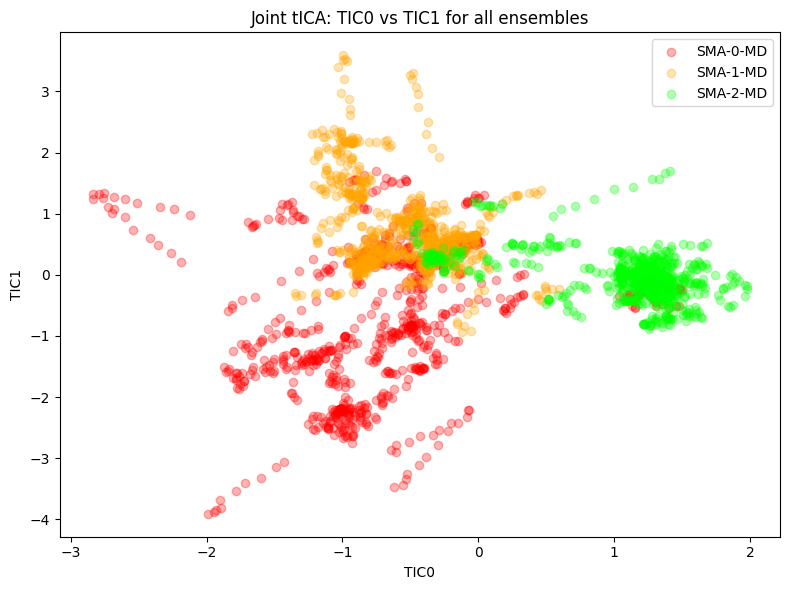

In [ ]:
# Joint tICA with dim=2
tica_2d = pyemma.coordinates.tica([sma_pca, sma_1_pca, sma_2_pca], lag=1, dim=2)
tic2_sma, tic2_sma_1, tic2_sma_2 = [o[:, :2] for o in tica_2d.get_output()]

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(tic2_sma[:,0], tic2_sma[:,1], label="SMA-0-MD", c='r', alpha=0.3)
plt.scatter(tic2_sma_1[:,0], tic2_sma_1[:,1], label="SMA-1-MD", c='orange', alpha=0.3)
plt.scatter(tic2_sma_2[:,0], tic2_sma_2[:,1], label="SMA-2-MD", c='lime', alpha=0.3)
plt.xlabel("TIC0")
plt.ylabel("TIC1")
plt.legend()
plt.title("Joint tICA: TIC0 vs TIC1 for all ensembles")
plt.tight_layout()
plt.savefig("tica2d_joint.png", dpi=200)
plt.show()

Although all three protocols converge to the same energy basin and share indistinguishable final structural ensembles, their kinetic trajectories sample distinct—though partially overlapping—regions of conformational space. This is evident from the joint tICA projections, where SMA-1-MD and SMA-2-MD mainly explore different metastable areas, while the original SMA ensemble covers both and more. These findings underscore not only the reliability but also the enhanced diversity and flexibility of the SMA-MD approach in exploring the full range of accessible conformational pathways

In [ ]:
sma_features = np.load('SMA_features.npy')
sma_1_features = np.load('sma_1_features.npy')
sma_2_features = np.load('sma_2_features.npy')

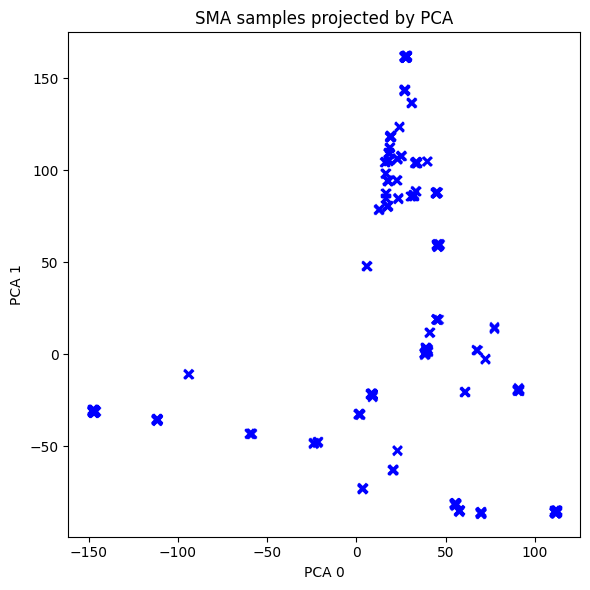

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 合并 SMA 采样点
sma_all = np.concatenate([sma_features, sma_1_features, sma_2_features], axis=0)  # shape: (all_samples, 63993)
# 降到二维
pca = PCA(n_components=2)
sma_pca = pca.fit_transform(sma_all)

plt.figure(figsize=(6,6))
plt.scatter(sma_pca[:,0], sma_pca[:,1], c='blue', alpha=0.7, marker='x')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.title('SMA samples projected by PCA')
plt.tight_layout()
plt.savefig('sma_pca_scatter.png', dpi=200)
plt.show()

calculate covariances:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

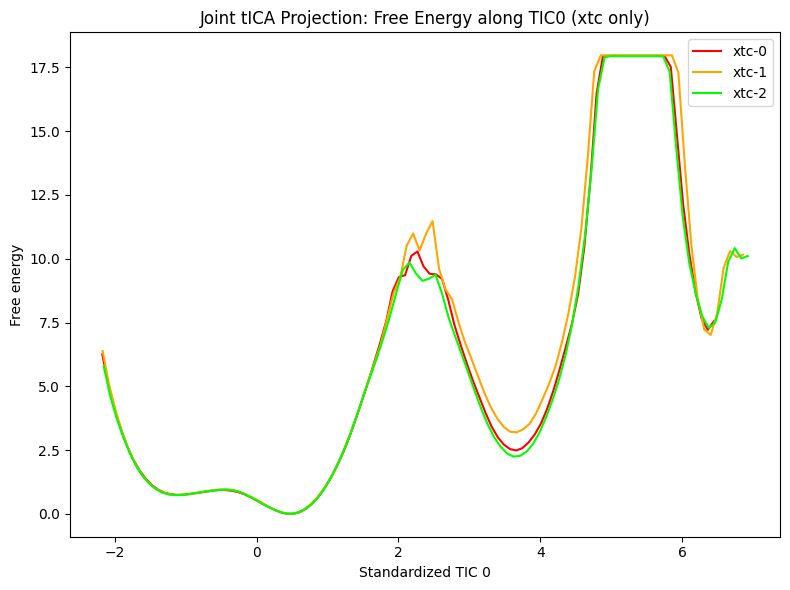

xtc-0: TIC0 mean=0.013, std=1.012
xtc-1: TIC0 mean=-0.053, std=0.909
xtc-2: TIC0 mean=0.040, std=1.070


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import mdtraj as md
import pyemma

# 1. 提取原始三组 xtc 的 backbone phi/psi
traj_filenames = [
    'alanine-dipeptide-0-250ns-nowater.xtc',
    'alanine-dipeptide-1-250ns-nowater.xtc',
    'alanine-dipeptide-2-250ns-nowater.xtc'
]
topology_file = 'alanine-dipeptide-nowater.pdb'

def get_phi_psi(traj_file, top_file):
    traj = md.load(traj_file, top=top_file)
    phi = md.compute_phi(traj)[1]
    psi = md.compute_psi(traj)[1]
    return np.hstack([phi, psi])

xtc0 = get_phi_psi(traj_filenames[0], topology_file)
xtc1 = get_phi_psi(traj_filenames[1], topology_file)
xtc2 = get_phi_psi(traj_filenames[2], topology_file)

# 2. Concatenate for joint preprocessing
all_xtc = np.concatenate([xtc0, xtc1, xtc2], axis=0)
n_xtc0 = len(xtc0)
n_xtc1 = len(xtc1)
n_xtc2 = len(xtc2)

# 3. Standardize all features
scaler = StandardScaler()
all_xtc_scaled = scaler.fit_transform(all_xtc)

# 4. Joint tICA fitting on all groups
# 先对每组分好
xtc0_scaled = all_xtc_scaled[:n_xtc0]
xtc1_scaled = all_xtc_scaled[n_xtc0:n_xtc0 + n_xtc1]
xtc2_scaled = all_xtc_scaled[n_xtc0 + n_xtc1:]

tica = pyemma.coordinates.tica([xtc0_scaled, xtc1_scaled, xtc2_scaled], lag=1, dim=1)
tic0_xtc0 = tica.get_output()[0][:, 0]
tic0_xtc1 = tica.get_output()[1][:, 0]
tic0_xtc2 = tica.get_output()[2][:, 0]

# 5. Standardize TIC0 (optional, for fair density comparison)
tic0_all = np.concatenate([tic0_xtc0, tic0_xtc1, tic0_xtc2])
scaler_tic = StandardScaler()
tic0_all_scaled = scaler_tic.fit_transform(tic0_all.reshape(-1, 1)).flatten()
tic0_xtc0_scaled = tic0_all_scaled[:len(tic0_xtc0)]
tic0_xtc1_scaled = tic0_all_scaled[len(tic0_xtc0):len(tic0_xtc0)+len(tic0_xtc1)]
tic0_xtc2_scaled = tic0_all_scaled[len(tic0_xtc0)+len(tic0_xtc1):]

# 6. Free energy landscape (KDE)
def free_energy_kde(x, grids=100):
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), grids)
    prob = kde(x_grid)
    fe = -np.log(prob + 1e-8)
    fe -= fe.min()
    return x_grid, fe

x_xtc0, fe_xtc0 = free_energy_kde(tic0_xtc0_scaled)
x_xtc1, fe_xtc1 = free_energy_kde(tic0_xtc1_scaled)
x_xtc2, fe_xtc2 = free_energy_kde(tic0_xtc2_scaled)

# 7. Plot
plt.figure(figsize=(8, 6))
plt.plot(x_xtc0, fe_xtc0, label='xtc-0', color='red')
plt.plot(x_xtc1, fe_xtc1, label='xtc-1', color='orange')
plt.plot(x_xtc2, fe_xtc2, label='xtc-2', color='lime')
plt.xlabel("Standardized TIC 0")
plt.ylabel("Free energy")
plt.title("Joint tICA Projection: Free Energy along TIC0 (xtc only)")
plt.legend()
plt.tight_layout()
plt.savefig("free_energy_tic0_xtc_only.png", dpi=200)
plt.show()

# 8. Print means/stds for reporting
print(f"xtc-0: TIC0 mean={np.mean(tic0_xtc0_scaled):.3f}, std={np.std(tic0_xtc0_scaled):.3f}")
print(f"xtc-1: TIC0 mean={np.mean(tic0_xtc1_scaled):.3f}, std={np.std(tic0_xtc1_scaled):.3f}")
print(f"xtc-2: TIC0 mean={np.mean(tic0_xtc2_scaled):.3f}, std={np.std(tic0_xtc2_scaled):.3f}")

calculate covariances:   0%|          | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/3 [00:00<?, ?it/s]

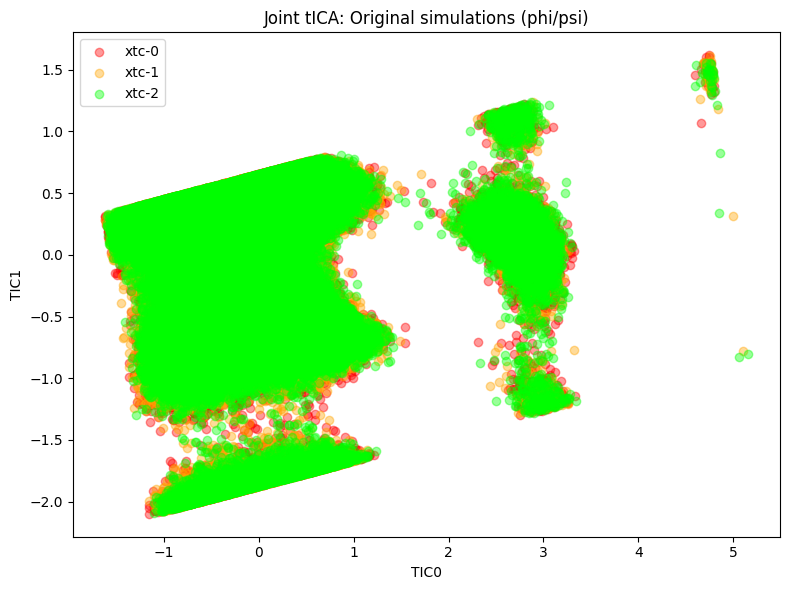

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
import warnings

# 1. 定义三组 xtc 轨迹和拓扑文件路径
traj_filenames = [
    'alanine-dipeptide-0-250ns-nowater.xtc',
    'alanine-dipeptide-1-250ns-nowater.xtc',
    'alanine-dipeptide-2-250ns-nowater.xtc'
]
topology_file = 'alanine-dipeptide-nowater.pdb'

# 2. 定义提取 backbone phi/psi 二面角的函数
def get_phi_psi(traj_file, top_file):
    traj = md.load(traj_file, top=top_file)
    phi = md.compute_phi(traj)[1]   # shape (n_frames, 1)
    psi = md.compute_psi(traj)[1]   # shape (n_frames, 1)
    return np.hstack([phi, psi])    # shape (n_frames, 2)

# 3. 对三条轨迹分别提取特征
raw_features = [get_phi_psi(f, topology_file) for f in traj_filenames]

# 4. 联合 tICA 分析
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    tica = pyemma.coordinates.tica(raw_features, lag=1, dim=2)
Y = tica.get_output()

# 5. 可视化 tICA 主空间分布
colors = ['red', 'orange', 'lime']
labels = ['xtc-0', 'xtc-1', 'xtc-2']

plt.figure(figsize=(8,6))
for i, (y, c, l) in enumerate(zip(Y, colors, labels)):
    plt.scatter(y[:,0], y[:,1], alpha=0.4, label=l, c=c)
plt.xlabel('TIC0')
plt.ylabel('TIC1')
plt.title('Joint tICA: Original simulations (phi/psi)')
plt.legend()
plt.tight_layout()
plt.savefig("joint_tica_xtc_only.png", dpi=200)
plt.show()